In [2]:
import numpy as np
import xarray as xr
from dask.diagnostics import ProgressBar
import os.path as op
import xrft
import xgcm
from xmitgcm import open_mdsdataset
from MITgcmutils import jmd95
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import sys
print(sys.version)

3.7.3 | packaged by conda-forge | (default, Jul  1 2019, 21:52:21) 
[GCC 7.3.0]


In [3]:
ddir = '/tank/chaocean/'

In [4]:
ds = open_mdsdataset(op.join(ddir,'qjamet/RUNS/ORAR/memb23/run2012/ocn/'), 
                     grid_dir = op.join(ddir,'grid_chaO/gridMIT_update1/'),
                     prefix = ['diag_ocnTave'], delta_t = 2e2)
ds

/tank/users/tuchida/miniconda3/envs/ensemble/lib/python3.7/site-packages/xmitgcm/mds_store.py:837: UserWarning: Couldn't find available_diagnostics.log in /tank/chaocean/qjamet/RUNS/ORAR/memb23/run2012/ocn/ or /tank/chaocean/grid_chaO/gridMIT_update1/. Using default version.
  "in %s or %s. Using default version." % (data_dir, grid_dir))
/tank/users/tuchida/miniconda3/envs/ensemble/lib/python3.7/site-packages/xmitgcm/mds_store.py:217: FutureWarning: In xarray version 0.15 `auto_combine` will be deprecated. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi
  ds = xr.auto_combine(datasets)
/tank/users/tuchida/miniconda3/envs/ensemble/lib/python3.7/site-packages/xmitgcm/mds_store.py:217: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the o

<xarray.Dataset>
Dimensions:  (XC: 1000, XG: 1000, YC: 900, YG: 900, Z: 46, Zl: 46, Zp1: 47, Zu: 46, time: 73)
Coordinates:
  * XC       (XC) >f4 262.00003 262.0861 262.17215 ... 347.88644 347.9725
  * YC       (YC) >f4 -19.916634 -19.8333 -19.749968 ... 54.916702 55.000034
  * XG       (XG) >f4 261.957 262.04306 262.12912 ... 347.8434 347.92947
  * YG       (YG) >f4 -19.9583 -19.874968 -19.791634 ... 54.875034 54.95837
  * Z        (Z) >f4 -3.0467727 -9.454049 -16.363966 ... -5624.9517 -5875.141
  * Zp1      (Zp1) >f4 0.0 -6.0935454 -12.814552 ... -5749.9097 -6000.3726
  * Zu       (Zu) >f4 -6.0935454 -12.814552 -19.91338 ... -5749.9097 -6000.3726
  * Zl       (Zl) >f4 0.0 -6.0935454 -12.814552 ... -5499.9937 -5749.9097
    rA       (YC, XC) >f4 dask.array<chunksize=(900, 1000), meta=np.ndarray>
    dxG      (YG, XC) >f4 dask.array<chunksize=(900, 1000), meta=np.ndarray>
    dyG      (YC, XG) >f4 dask.array<chunksize=(900, 1000), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<c

In [14]:
ds.time

<xarray.DataArray 'time' (time: 73)>
array([1.703376e+09, 1.703808e+09, 1.704240e+09, 1.704672e+09, 1.705104e+09,
       1.705536e+09, 1.705968e+09, 1.706400e+09, 1.706832e+09, 1.707264e+09,
       1.707696e+09, 1.708128e+09, 1.708560e+09, 1.708992e+09, 1.709424e+09,
       1.709856e+09, 1.710288e+09, 1.710720e+09, 1.711152e+09, 1.711584e+09,
       1.712016e+09, 1.712448e+09, 1.712880e+09, 1.713312e+09, 1.713744e+09,
       1.714176e+09, 1.714608e+09, 1.715040e+09, 1.715472e+09, 1.715904e+09,
       1.716336e+09, 1.716768e+09, 1.717200e+09, 1.717632e+09, 1.718064e+09,
       1.718496e+09, 1.718928e+09, 1.719360e+09, 1.719792e+09, 1.720224e+09,
       1.720656e+09, 1.721088e+09, 1.721520e+09, 1.721952e+09, 1.722384e+09,
       1.722816e+09, 1.723248e+09, 1.723680e+09, 1.724112e+09, 1.724544e+09,
       1.724976e+09, 1.725408e+09, 1.725840e+09, 1.726272e+09, 1.726704e+09,
       1.727136e+09, 1.727568e+09, 1.728000e+09, 1.728432e+09, 1.728864e+09,
       1.729296e+09, 1.729728e+09, 1.73

In [5]:
grid = xgcm.grid.Grid(ds, periodic=['X'])
grid

<xgcm.Grid>
T Axis (not periodic):
  * center   time
Z Axis (not periodic):
  * center   Z --> left
  * left     Zl --> center
  * outer    Zp1 --> center
  * right    Zu --> center
Y Axis (not periodic):
  * center   YC --> left
  * left     YG --> center
X Axis (periodic):
  * center   XC --> left
  * left     XG --> center

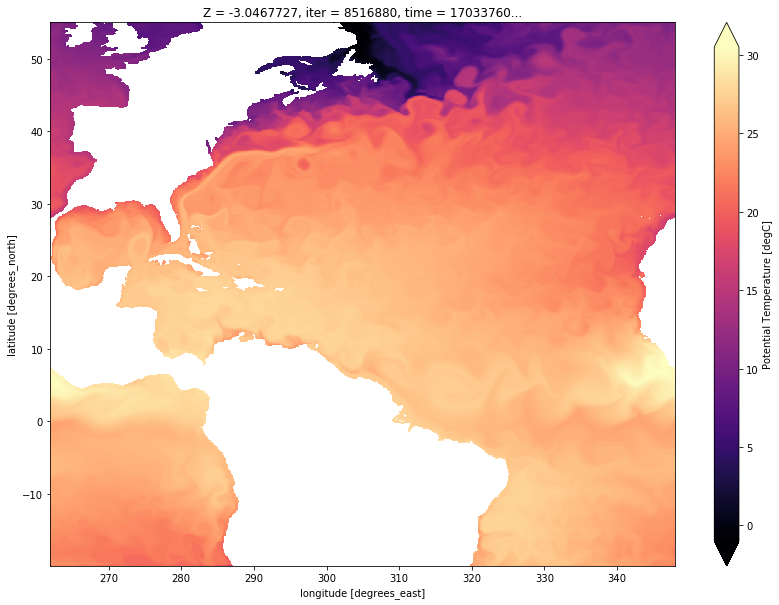

In [11]:
ds.THETA[0,0].where(ds.maskC[0]!=0.).plot(figsize=(14,10), cmap='magma', vmin=-1, vmax=30.5)

In [6]:
with ProgressBar():
    sig2 = xr.apply_ufunc(jmd95.densjmd95, ds.SALT[0].load(), ds.THETA[0].load(), 2000).compute() - 1e3
sig2

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s


<xarray.DataArray (Z: 46, YC: 900, XC: 1000)>
array([[[33.82438743, 33.83441073, 33.84539731, ..., 33.8013674 ,
         33.80769916, 33.81536499],
        [33.78842468, 33.78879672, 33.78959376, ..., 33.78828529,
         33.78820073, 33.78817687],
        [33.71291871, 33.70119043, 33.68932121, ..., 33.74153036,
         33.73324022, 33.72354807],
        ...,
        [35.76201308, 35.78588902, 35.81433646, ..., 35.74285496,
         35.73790547, 35.74527816],
        [35.87638933, 35.89324347, 35.90966012, ..., 35.82963089,
         35.84270503, 35.85941234],
        [35.95886427, 35.95443142, 35.95010163, ..., 35.95011549,
         35.95579517, 35.95986399]],

       [[33.84575554, 33.85567002, 33.86650716, ..., 33.82305288,
         33.82929304, 33.83684415],
        [33.79746173, 33.79774352, 33.79843713, ..., 33.79775449,
         33.79752204, 33.79734848],
        [33.72021969, 33.7083746 , 33.69632817, ..., 33.74955458,
         33.741079  , 33.7311138 ],
        ...,
        

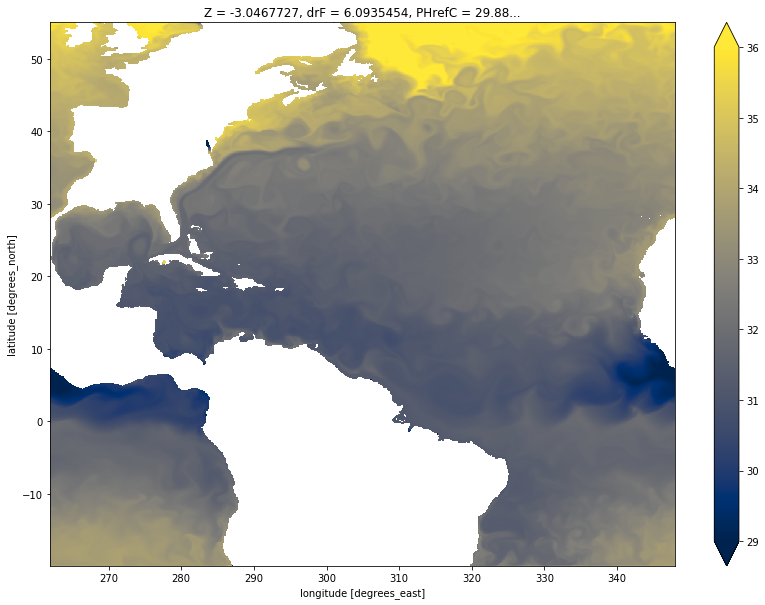

In [13]:
sig2[0].where(sig2.maskC[0]!=0.).plot(figsize=(14,10), cmap='cividis', vmin=29, vmax=36)

In [34]:
sig2_x = (sig2*sig2.hFacC).sum('XC')/sig2.hFacC.sum('XC')
sig2_x

<xarray.DataArray (Z: 46, YC: 900)>
array([[1033.53225631, 1033.33565489, 1033.12991872, ..., 1035.97643059,
        1036.02591114, 1036.03671123],
       [1033.55471784, 1033.34956562, 1033.14564669, ..., 1035.98944347,
        1036.0289211 , 1036.03754534],
       [1033.57977544, 1033.39531025, 1033.21901813, ..., 1036.00226637,
        1036.04992085, 1036.06824661],
       ...,
       [1036.18093298, 1037.11594424, 1037.11903662, ...,           nan,
                  nan,           nan],
       [1033.85694525, 1037.13597467, 1037.13081415, ...,           nan,
                  nan,           nan],
       [1029.46510756, 1037.15290942,           nan, ...,           nan,
                  nan,           nan]])
Coordinates:
  * YC       (YC) >f4 -19.916634 -19.8333 -19.749968 ... 54.916702 55.000034
  * Z        (Z) >f4 -3.0467727 -9.454049 -16.363966 ... -5624.9517 -5875.141
    drF      (Z) >f4 6.0935454 6.721007 7.098827 ... 249.91599 250.46292
    PHrefC   (Z) >f4 29.88884 92.74422

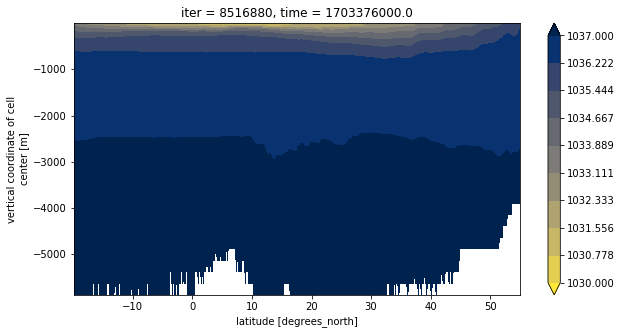

In [39]:
sig2_x.plot.contourf(figsize=(10,5), cmap='cividis_r', levels=np.linspace(1030,1037,10), extend='both')